IMPORTING DATA FROM CSV FILE USING PANDAS

In [40]:
import pandas as pd
import numpy as np
data=pd.read_csv('D:\ph-data.csv' )  
x = data.iloc[:, [0,1,2]].values
y = data.iloc[:, [3]].values

Modify Data

In [41]:
for i in range (0,y.size):
    if y[i,0] < 7 :
        y[i,0]=0
    elif y[i,0] == 7:
        y[i,0]=1
    else:
        y[i,0]=2     

In [42]:
print("No. of Base : ",np.count_nonzero(y == 2))
print("No. of Nutral : ",np.count_nonzero(y == 1))
print("No. of Acid : ",np.count_nonzero(y == 0))

No. of Base :  307
No. of Nutral :  44
No. of Acid :  302


Splitting Data for Training and Testing

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20)

Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train,Y_train)

G:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
Y_pred = lgr.predict(X_test)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("USING LOGISTIC REGRESSION :")
print("Accuracy : ",lgr.score(X_test,Y_test)*100,"%")
print("Confusion matrix")
print(confusion_matrix(Y_test, Y_pred))
print("Classification report")
print(classification_report(Y_test, Y_pred))

USING LOGISTIC REGRESSION :
Accuracy :  93.89312977099237 %
Confusion matrix
[[70  0  1]
 [ 2  3  2]
 [ 1  2 50]]
Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.60      0.43      0.50         7
           2       0.94      0.94      0.94        53

    accuracy                           0.94       131
   macro avg       0.83      0.79      0.81       131
weighted avg       0.93      0.94      0.94       131



<IPython.core.display.Javascript object>


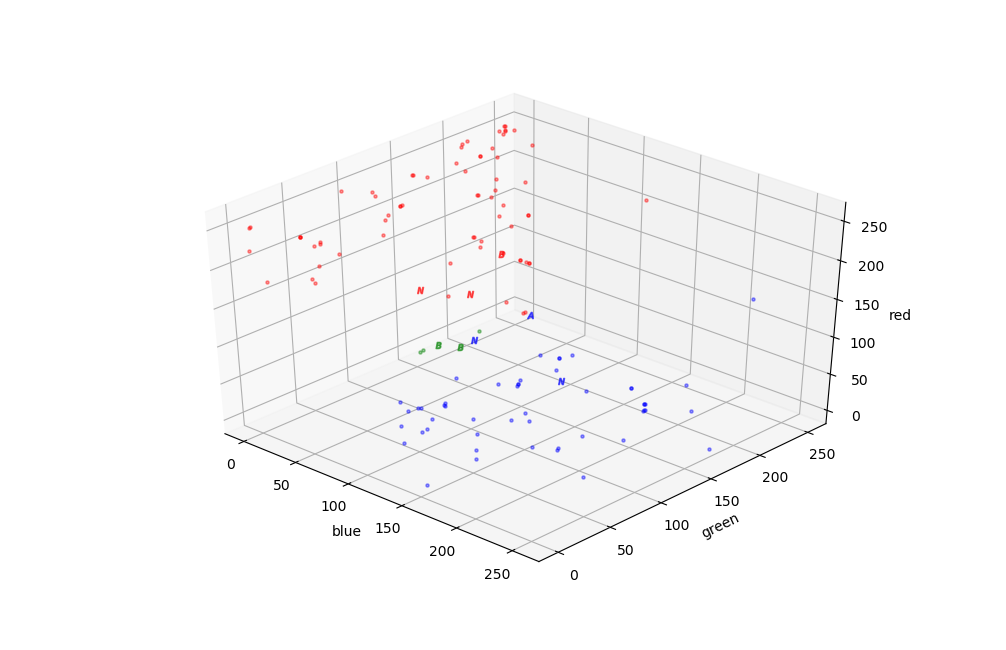

In [113]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
axi = fig.add_subplot(111,projection='3d')
colmap=['red','green','blue']
markermap=['$ A $','$ N $','$ B $']
for i in range(0,Y_pred.size):
    if Y_pred[i]==Y_test[i]:
        scatter=axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker='.',alpha=0.4)
    else:
        axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker=markermap[Y_test[i,0]],alpha=0.6)
axi.set_xlabel('blue')   
axi.set_ylabel('green')
axi.set_zlabel('red')
plt.show()

Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier as dtc
clf_gini = dtc(criterion = 'gini')
clf_gini.fit(X_train, Y_train)
clf_entropy = dtc(criterion = 'entropy')
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [115]:
print("USING DECISION TREE (GINI INDEX):")
print("Accuracy : ",clf_gini.score(X_test,Y_test))
print("Confusion matrix")
Y_pred = clf_gini.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print("Classification report")
print(classification_report(Y_test, Y_pred))

USING DECISION TREE (GINI INDEX):
Accuracy :  0.9312977099236641
Confusion matrix
[[69  2  0]
 [ 1  4  2]
 [ 1  3 49]]
Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.44      0.57      0.50         7
           2       0.96      0.92      0.94        53

    accuracy                           0.93       131
   macro avg       0.79      0.82      0.80       131
weighted avg       0.94      0.93      0.93       131



<IPython.core.display.Javascript object>


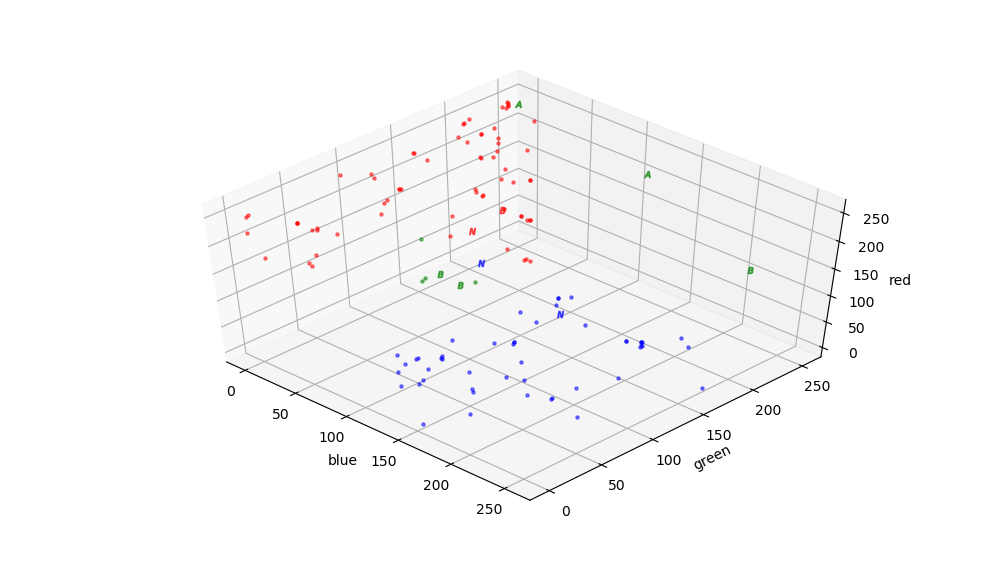

In [116]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
axi = fig.add_subplot(111,projection='3d')
colmap=['red','green','blue']
markermap=['$ A $','$ N $','$ B $']
for i in range(0,Y_pred.size):
    if Y_pred[i]==Y_test[i]:
        scatter=axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker='.',alpha=0.5)
    else:
        axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker=markermap[Y_test[i,0]],alpha=0.6)
axi.set_xlabel('blue')   
axi.set_ylabel('green')
axi.set_zlabel('red')
plt.show()

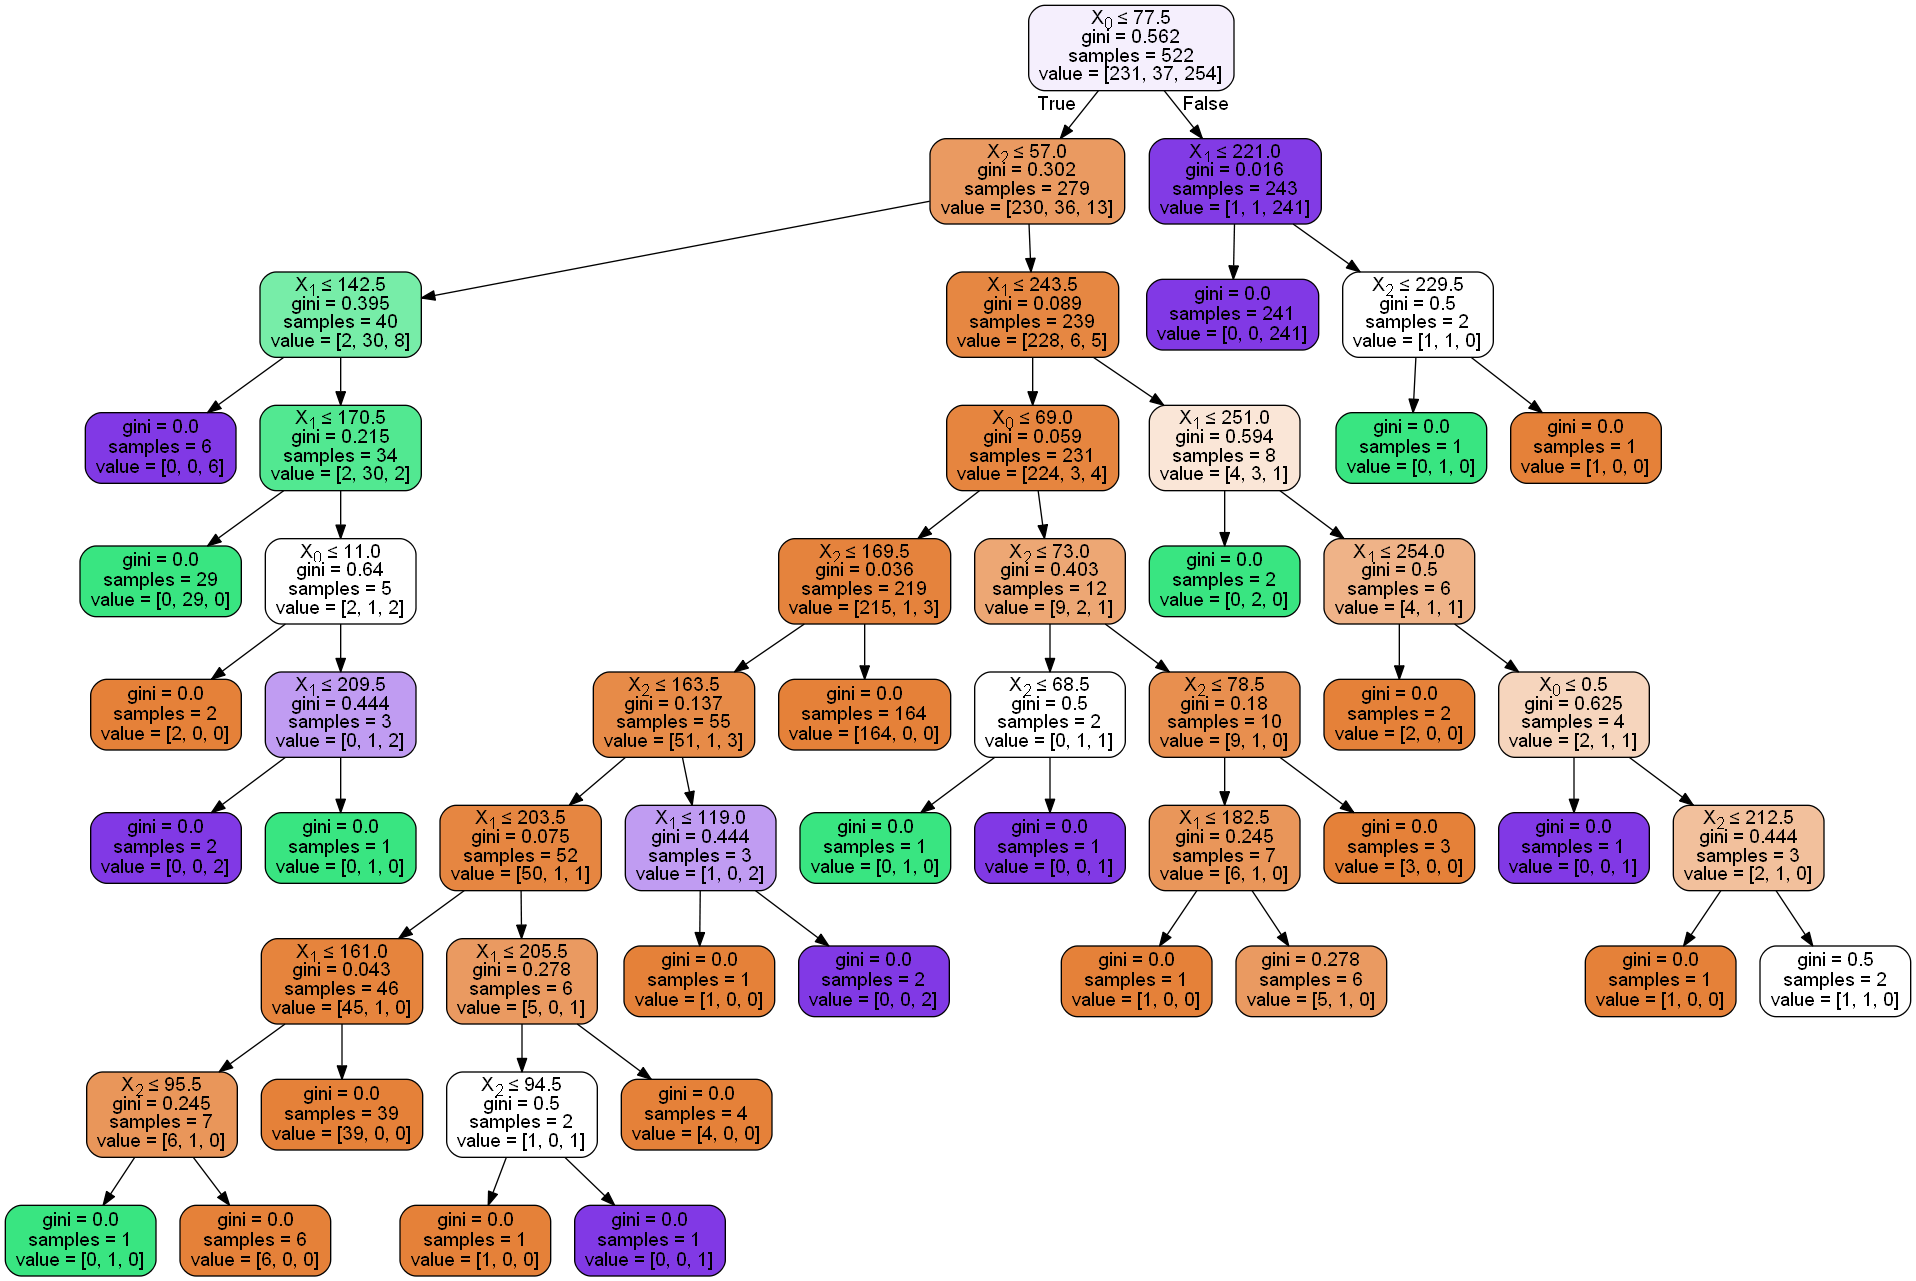

In [117]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
img=graph.create_png()
Image(img)

In [118]:
print("USING DECISION TREE (ENTROPY):")
print("Accuracy : ",clf_entropy.score(X_test,Y_test))
print("Confusion matrix")
Y_pred = clf_entropy.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print("Classification report")
print(classification_report(Y_test, Y_pred))

USING DECISION TREE (ENTROPY):
Accuracy :  0.9312977099236641
Confusion matrix
[[69  2  0]
 [ 1  4  2]
 [ 1  3 49]]
Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.44      0.57      0.50         7
           2       0.96      0.92      0.94        53

    accuracy                           0.93       131
   macro avg       0.79      0.82      0.80       131
weighted avg       0.94      0.93      0.93       131



<IPython.core.display.Javascript object>


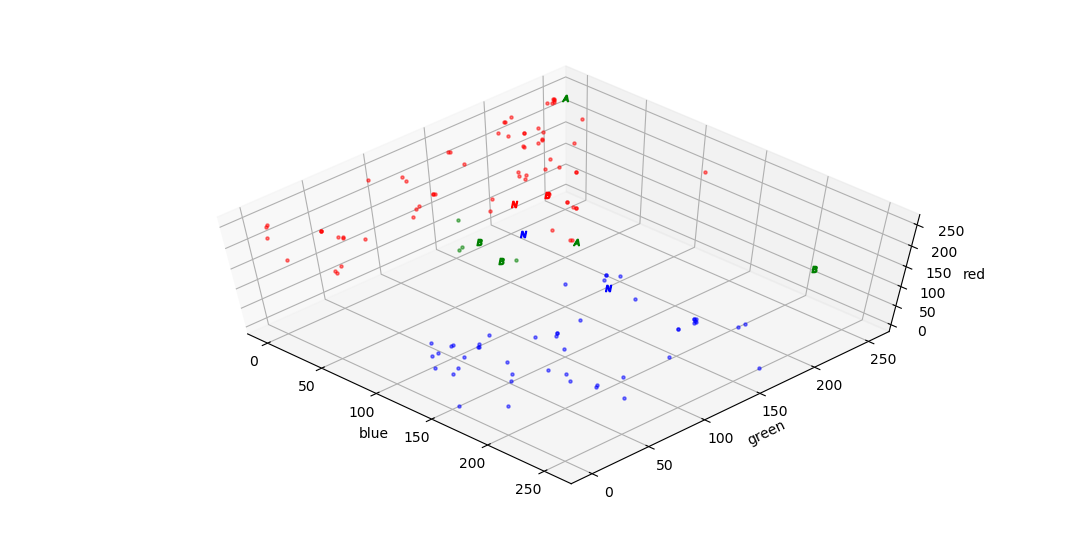

In [121]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
axi = fig.add_subplot(111,projection='3d')
colmap=['red','green','blue']
markermap=['$ A $','$ N $','$ B $']
for i in range(0,Y_pred.size):
    if Y_pred[i]==Y_test[i]:
        scatter=axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker='.',alpha=0.5)
    else:
        axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker=markermap[Y_test[i,0]],)
axi.set_xlabel('blue')   
axi.set_ylabel('green')
axi.set_zlabel('red')
plt.show()

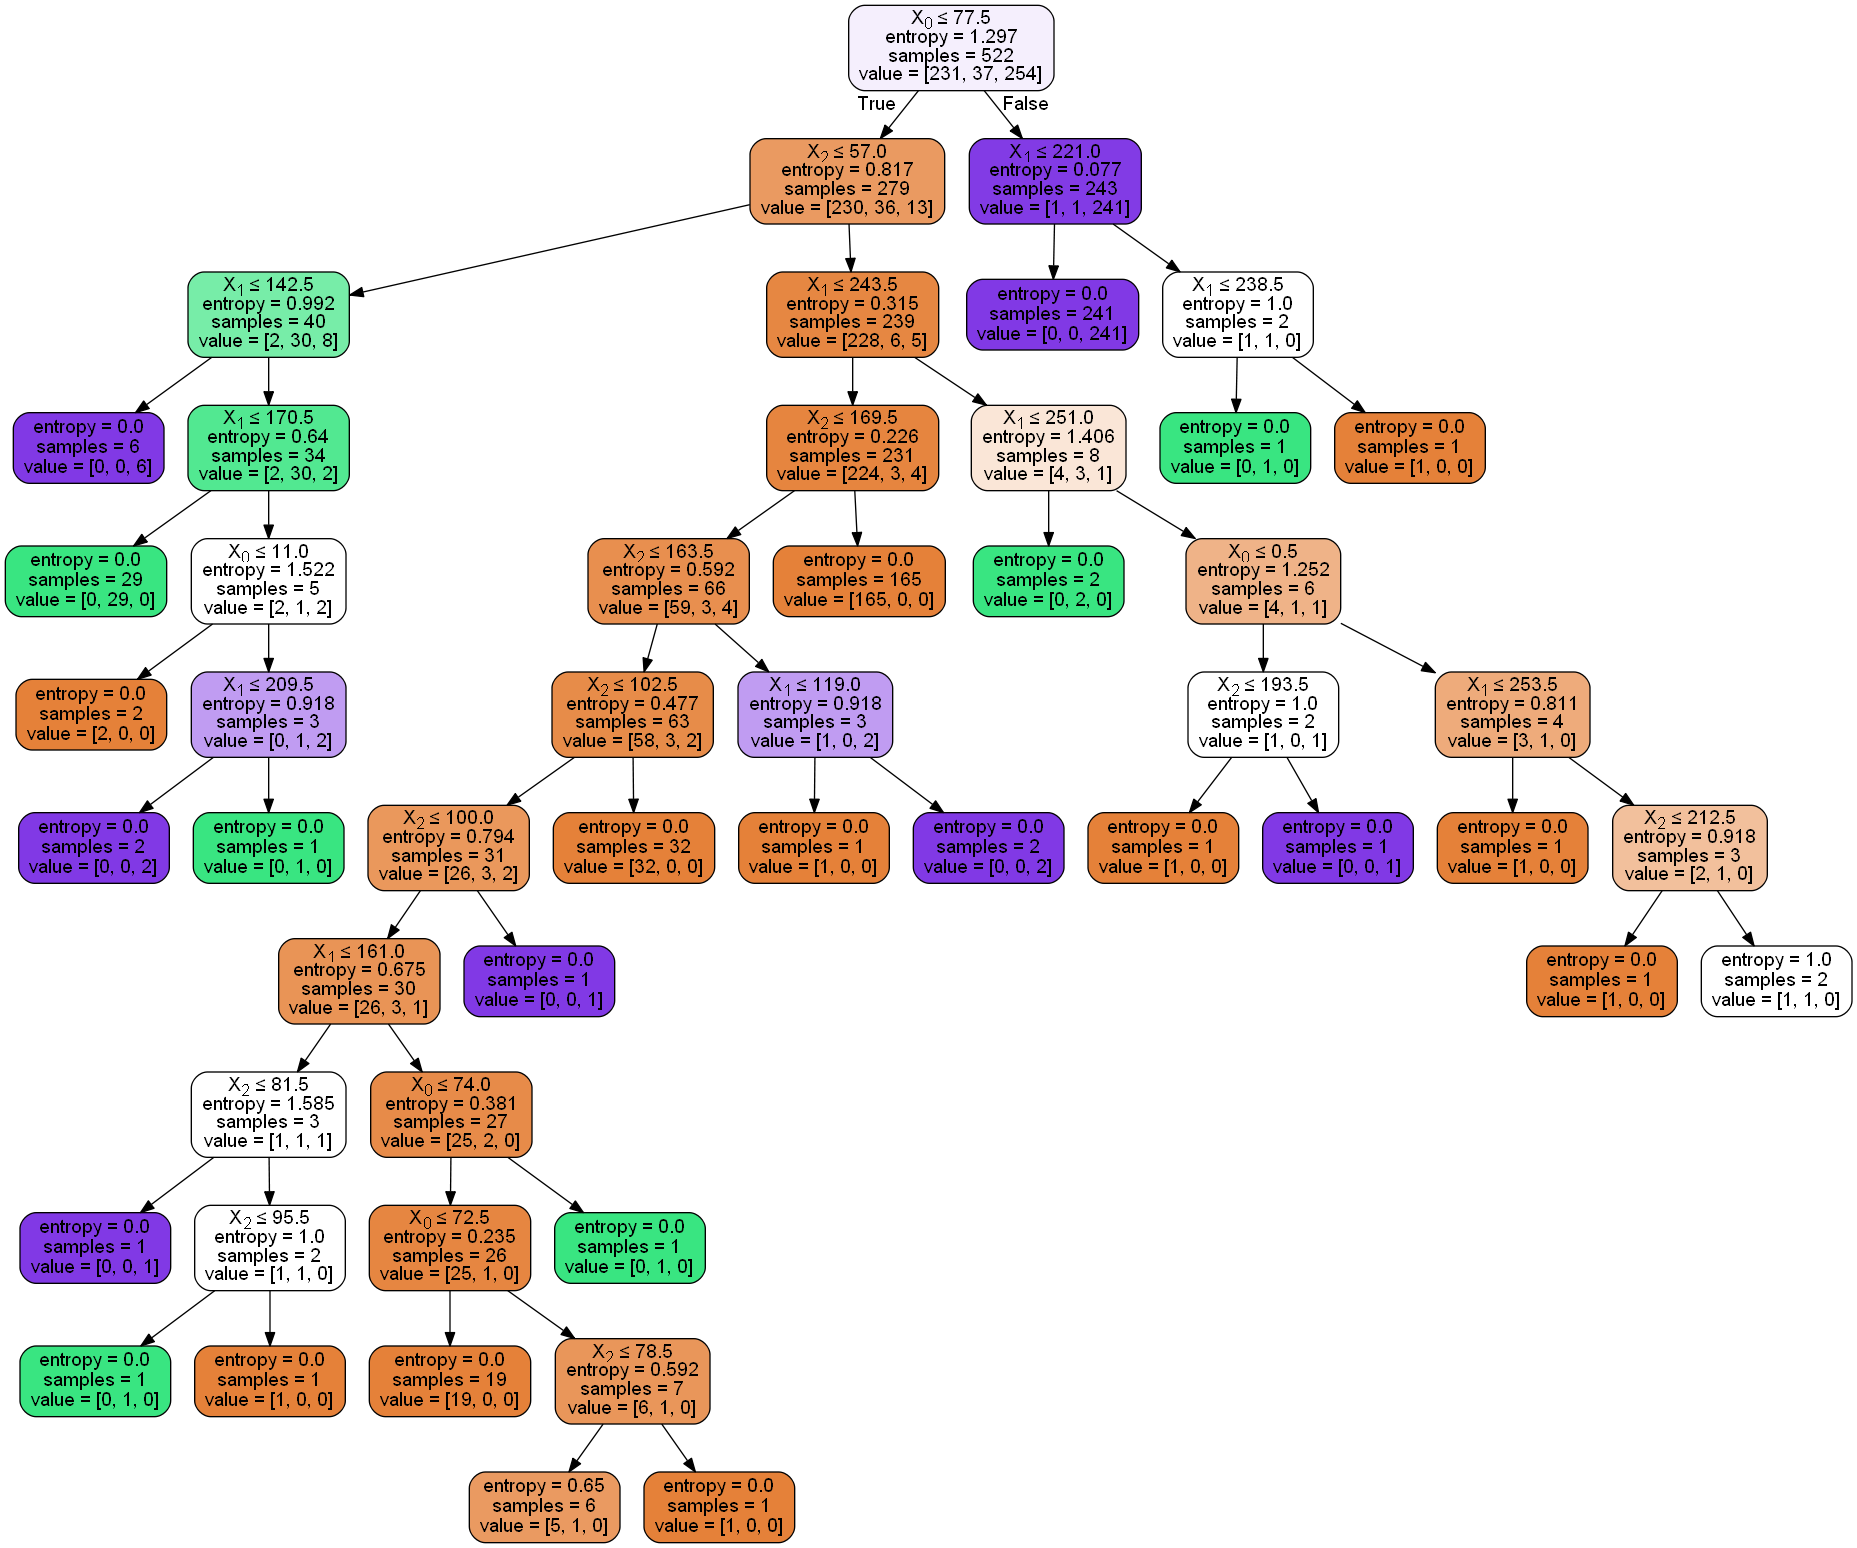

In [122]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
img=graph.create_png()
Image(img)

Support Vector Machine

In [123]:
from sklearn import svm 

In [124]:
clf_linear = svm.SVC(kernel='linear',gamma='scale')
clf_linear.fit(X_train, Y_train)

G:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
print("USING LINEAR KERNEL :")
print("Accuracy : ",clf_linear.score(X_test,Y_test))
print("Confusion matrix")
Y_pred = clf_linear.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

USING LINEAR KERNEL :
Accuracy :  0.9236641221374046
Confusion matrix
[[68  3  0]
 [ 3  3  1]
 [ 1  2 50]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.38      0.43      0.40         7
           2       0.98      0.94      0.96        53

    accuracy                           0.92       131
   macro avg       0.77      0.78      0.77       131
weighted avg       0.93      0.92      0.93       131



<IPython.core.display.Javascript object>


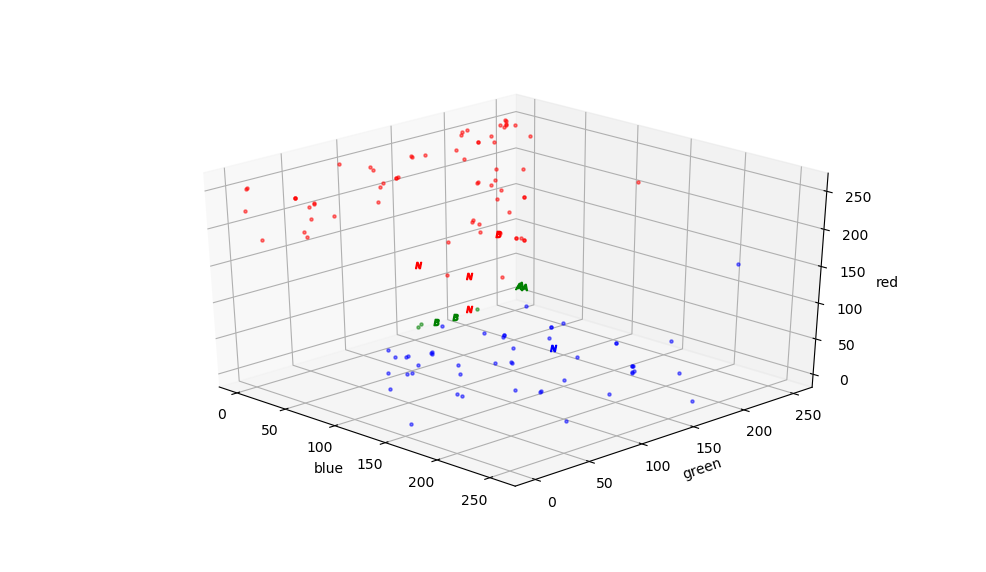

In [127]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
axi = fig.add_subplot(111,projection='3d')
colmap=['red','green','blue']
markermap=['$ A $','$ N $','$ B $']
for i in range(0,Y_pred.size):
    if Y_pred[i]==Y_test[i]:
        scatter=axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker='.',alpha=0.5)
    else:
        axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker=markermap[Y_test[i,0]],)
axi.set_xlabel('blue')   
axi.set_ylabel('green')
axi.set_zlabel('red')
plt.show()

In [128]:
clf_rbf = svm.SVC(kernel='rbf',gamma='scale')
clf_rbf.fit(X_train, Y_train)

G:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
print("USING RBF KERNEL :")
print("Accuracy : ",clf_rbf.score(X_test,Y_test))
print("Confusion matrix")
Y_pred = clf_rbf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

USING RBF KERNEL :
Accuracy :  0.9541984732824428
Confusion matrix
[[71  0  0]
 [ 2  4  1]
 [ 1  2 50]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       0.67      0.57      0.62         7
           2       0.98      0.94      0.96        53

    accuracy                           0.95       131
   macro avg       0.87      0.84      0.85       131
weighted avg       0.95      0.95      0.95       131



<IPython.core.display.Javascript object>


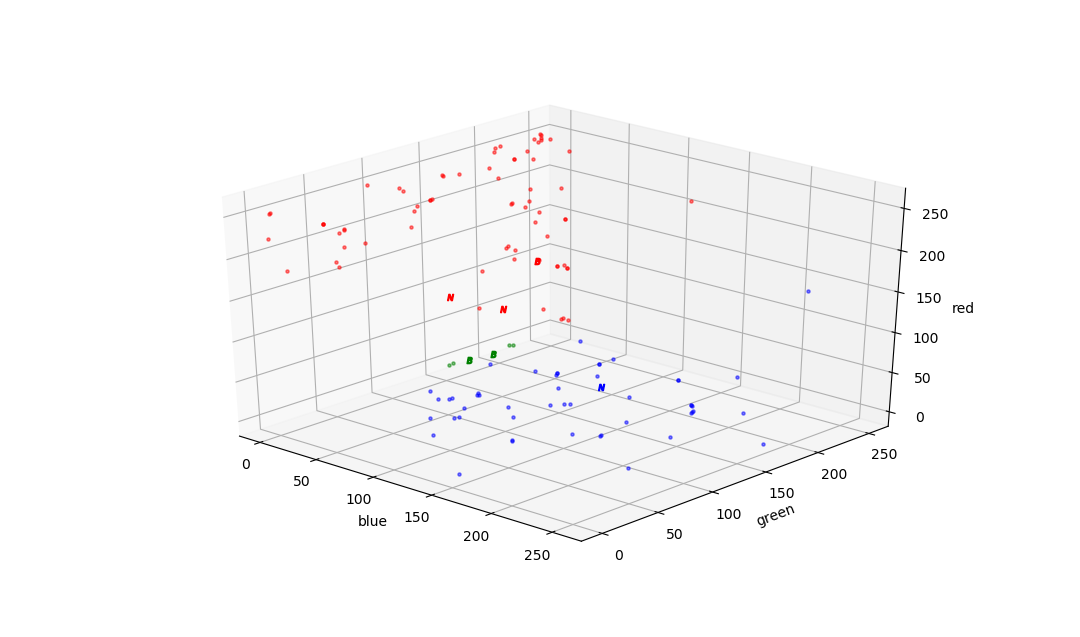

In [131]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
axi = fig.add_subplot(111,projection='3d')
colmap=['red','green','blue']
markermap=['$ A $','$ N $','$ B $']
for i in range(0,Y_pred.size):
    if Y_pred[i]==Y_test[i]:
        scatter=axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker='.',alpha=0.5)
    else:
        axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker=markermap[Y_test[i,0]],)
axi.set_xlabel('blue')   
axi.set_ylabel('green')
axi.set_zlabel('red')
plt.show()

In [132]:
clf_poly = svm.SVC(kernel='poly',gamma='scale',degree = 4)
clf_poly.fit(X_train, Y_train)

G:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [133]:
print("USING POLYNOMIAL KERNEL :")
print("Accuracy : ",clf_poly.score(X_test,Y_test))
print("Confusion matrix")
Y_pred = clf_poly.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

USING POLYNOMIAL KERNEL :
Accuracy :  0.9389312977099237
Confusion matrix
[[69  2  0]
 [ 1  4  2]
 [ 1  2 50]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.50      0.57      0.53         7
           2       0.96      0.94      0.95        53

    accuracy                           0.94       131
   macro avg       0.81      0.83      0.82       131
weighted avg       0.94      0.94      0.94       131



<IPython.core.display.Javascript object>


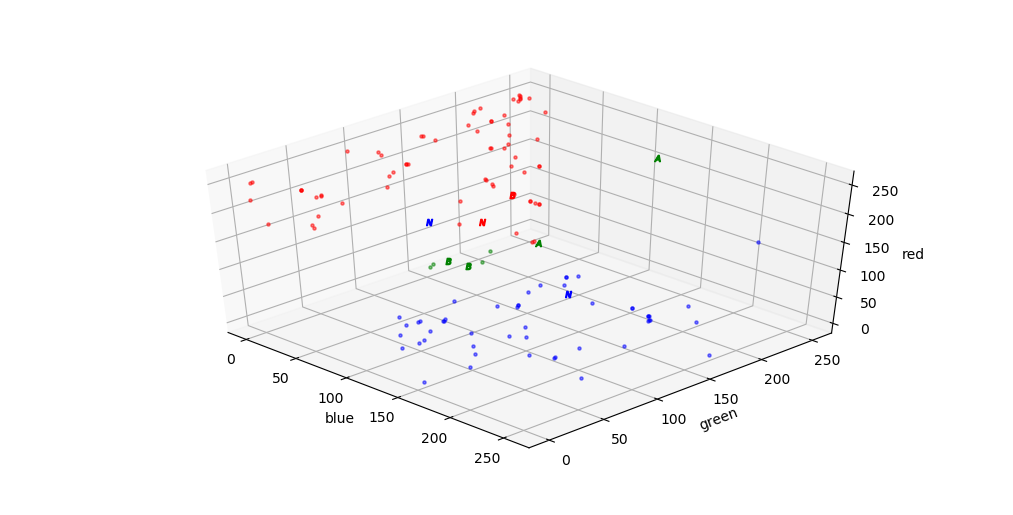

In [135]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
axi = fig.add_subplot(111,projection='3d')
colmap=['red','green','blue']
markermap=['$ A $','$ N $','$ B $']
for i in range(0,Y_pred.size):
    if Y_pred[i]==Y_test[i]:
        scatter=axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker='.',alpha=0.5)
    else:
        axi.scatter(X_test[i,0],X_test[i,1],X_test[i,2],color=colmap[Y_pred[i]],marker=markermap[Y_test[i,0]],)
axi.set_xlabel('blue')   
axi.set_ylabel('green')
axi.set_zlabel('red')
plt.show()